# Resolution of Singularity for 1-hidden-layer ReLU network

In [1]:
from blowup_tree import BlowupTree
import networkx as nx
from IPython.display import display, Math
import matplotlib.pyplot as plt

# $h = 2$ case

In [2]:
btree_h2 = BlowupTree(2)
btree_h2.blowup_game()

Enter coordinate indices:  0 2


KeyboardInterrupt: Interrupted by user

# $h = 3$ case

In [3]:
btree = BlowupTree(2, verbose=True)
btree.blowup_game()


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices:  0 2


Blowup coords    : [0, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices:  1 2


Blowup coords    : [1, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices:  1 3


Blowup coords    : [1, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices:  0 3


Blowup coords    : [0, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices:  1 3


Blowup coords    : [1, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Tasks stack is empty!


### Visualise

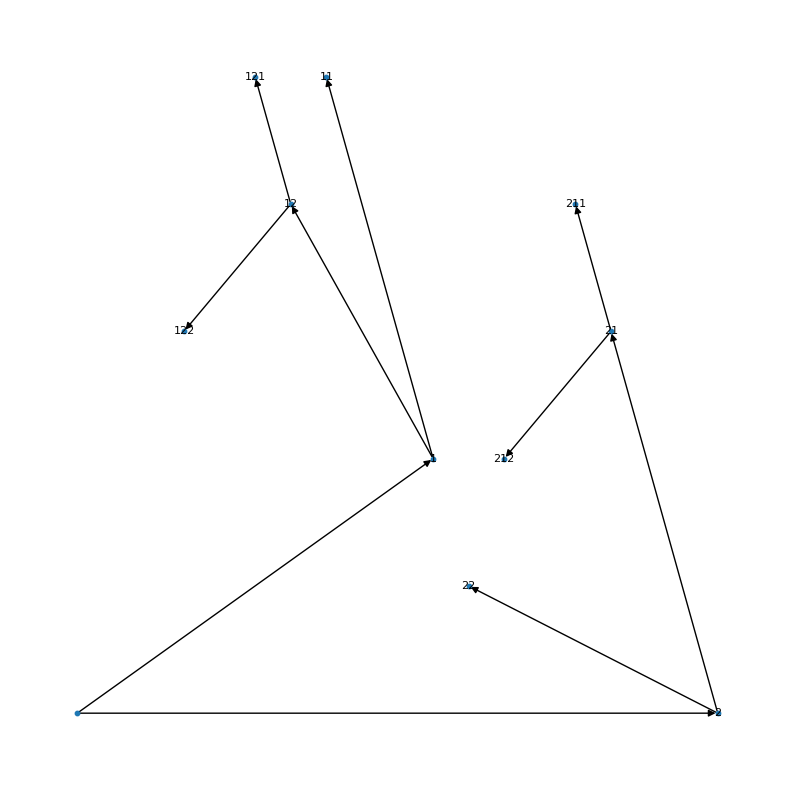

In [4]:
T = btree.tree
assert nx.is_tree(T)
fig, ax = plt.subplots(1,1, figsize=(10, 10))
nx.draw(
    T, 
    with_labels=True, 
#     font_weight="bold", 
    ax=ax, 
#     pos=nx.kamada_kawai_layout(T), 
    pos=nx.planar_layout(T), 
    node_size=10, 
    font_size=8,
)
# list(nx.topological_generations(T))

## Resolution map, Jacobian Matrix, RLCT

In [30]:
from sympy import *
from utils import *
f = btree.f
K = btree.K

for chart in nx.dfs_preorder_nodes(T, source=''):
    rec = T.nodes[chart]
    m = rec["map"]
    expr = rec["expr"]
    var_list = rec["vars"]
    
    f_pullback = f.subs(m).factor()
    K_pullback = K.subs(m).factor()
    assert Eq(expand(expr - f_pullback), 0)
    is_nc = is_normal_crossing(f_pullback)
    J = get_jacobian_matrix(m, var_list)
    det = J.det()
    
    rec["is_normal_crossing"] = is_nc
    rec["J"] = J
    rec["det(J)"] = det
    rec["f_pullback"] = f_pullback
    
    if len(list(T.successors(chart))) == 0:
        print(f"\n-----------\nIs leaf. Is normal crossing? {is_nc}")
        display(Math(latex(f_pullback)))
        display(Math(latex(det)))

        rlcts = get_rlct(f_pullback, det)
        rec["rlcts"] = rlcts
        for s, lmbda_val in rlcts:
            lmbda_s = symbols(f"lambda_{s}")
            display(Math(f"{latex(Eq(lmbda_s, lmbda_val))}"))
        # display(Math(f"RLCTS = {latex(rlcts)}"))
        display(Math(latex(J)))
        for x in m:
            display(Math(latex(Eq(x[0], x[1]))))
        
        display(Math(latex(K_pullback)))
        assert is_normal_crossing(K_pullback)


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(33)


<IPython.core.display.Math object>

lambda_b_3^(33)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(323)


<IPython.core.display.Math object>

lambda_b_2^(323)


<IPython.core.display.Math object>

lambda_b_3^(323)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(322)


<IPython.core.display.Math object>

lambda_a_3^(322)


<IPython.core.display.Math object>

lambda_b_2^(322)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(3213)


<IPython.core.display.Math object>

lambda_a_3^(3213)


<IPython.core.display.Math object>

lambda_b_2^(3213)


<IPython.core.display.Math object>

lambda_b_3^(3213)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(3212)


<IPython.core.display.Math object>

lambda_a_2^(3212)


<IPython.core.display.Math object>

lambda_a_3^(3212)


<IPython.core.display.Math object>

lambda_b_2^(3212)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(3211)


<IPython.core.display.Math object>

lambda_a_3^(3211)


<IPython.core.display.Math object>

lambda_b_1^(3211)


<IPython.core.display.Math object>

lambda_b_2^(3211)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(313)


<IPython.core.display.Math object>

lambda_b_1^(313)


<IPython.core.display.Math object>

lambda_b_3^(313)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(3123)


<IPython.core.display.Math object>

lambda_a_3^(3123)


<IPython.core.display.Math object>

lambda_b_1^(3123)


<IPython.core.display.Math object>

lambda_b_3^(3123)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(3122)


<IPython.core.display.Math object>

lambda_a_3^(3122)


<IPython.core.display.Math object>

lambda_b_1^(3122)


<IPython.core.display.Math object>

lambda_b_2^(3122)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(3121)


<IPython.core.display.Math object>

lambda_a_2^(3121)


<IPython.core.display.Math object>

lambda_a_3^(3121)


<IPython.core.display.Math object>

lambda_b_1^(3121)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(311)


<IPython.core.display.Math object>

lambda_a_3^(311)


<IPython.core.display.Math object>

lambda_b_1^(311)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(233)


<IPython.core.display.Math object>

lambda_b_2^(233)


<IPython.core.display.Math object>

lambda_b_3^(233)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(232)


<IPython.core.display.Math object>

lambda_b_2^(232)


<IPython.core.display.Math object>

lambda_b_3^(232)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(2313)


<IPython.core.display.Math object>

lambda_a_3^(2313)


<IPython.core.display.Math object>

lambda_b_2^(2313)


<IPython.core.display.Math object>

lambda_b_3^(2313)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(2312)


<IPython.core.display.Math object>

lambda_a_2^(2312)


<IPython.core.display.Math object>

lambda_b_2^(2312)


<IPython.core.display.Math object>

lambda_b_3^(2312)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(2311)


<IPython.core.display.Math object>

lambda_b_1^(2311)


<IPython.core.display.Math object>

lambda_b_2^(2311)


<IPython.core.display.Math object>

lambda_b_3^(2311)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(22)


<IPython.core.display.Math object>

lambda_b_2^(22)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(2133)


<IPython.core.display.Math object>

lambda_b_1^(2133)


<IPython.core.display.Math object>

lambda_b_2^(2133)


<IPython.core.display.Math object>

lambda_b_3^(2133)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(2132)


<IPython.core.display.Math object>

lambda_b_1^(2132)


<IPython.core.display.Math object>

lambda_b_2^(2132)


<IPython.core.display.Math object>

lambda_b_3^(2132)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(2131)


<IPython.core.display.Math object>

lambda_b_1^(2131)


<IPython.core.display.Math object>

lambda_b_2^(2131)


<IPython.core.display.Math object>

lambda_b_3^(2131)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(212)


<IPython.core.display.Math object>

lambda_b_1^(212)


<IPython.core.display.Math object>

lambda_b_2^(212)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(211)


<IPython.core.display.Math object>

lambda_b_1^(211)


<IPython.core.display.Math object>

lambda_b_2^(211)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(133)


<IPython.core.display.Math object>

lambda_b_1^(133)


<IPython.core.display.Math object>

lambda_b_3^(133)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_3^(1323)


<IPython.core.display.Math object>

lambda_b_1^(1323)


<IPython.core.display.Math object>

lambda_b_2^(1323)


<IPython.core.display.Math object>

lambda_b_3^(1323)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(1322)


<IPython.core.display.Math object>

lambda_b_1^(1322)


<IPython.core.display.Math object>

lambda_b_2^(1322)


<IPython.core.display.Math object>

lambda_b_3^(1322)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(1321)


<IPython.core.display.Math object>

lambda_b_1^(1321)


<IPython.core.display.Math object>

lambda_b_2^(1321)


<IPython.core.display.Math object>

lambda_b_3^(1321)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(131)


<IPython.core.display.Math object>

lambda_b_1^(131)


<IPython.core.display.Math object>

lambda_b_3^(131)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(1233)


<IPython.core.display.Math object>

lambda_a_3^(1233)


<IPython.core.display.Math object>

lambda_b_1^(1233)


<IPython.core.display.Math object>

lambda_b_3^(1233)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(1232)


<IPython.core.display.Math object>

lambda_a_3^(1232)


<IPython.core.display.Math object>

lambda_b_1^(1232)


<IPython.core.display.Math object>

lambda_b_2^(1232)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(1231)


<IPython.core.display.Math object>

lambda_a_2^(1231)


<IPython.core.display.Math object>

lambda_a_3^(1231)


<IPython.core.display.Math object>

lambda_b_1^(1231)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_2^(122)


<IPython.core.display.Math object>

lambda_b_1^(122)


<IPython.core.display.Math object>

lambda_b_2^(122)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(121)


<IPython.core.display.Math object>

lambda_a_2^(121)


<IPython.core.display.Math object>

lambda_b_1^(121)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

lambda_a_1^(11)


<IPython.core.display.Math object>

lambda_b_1^(11)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# General case

In [5]:
H = 4
btree = BlowupTree(H, verbose=True)
btree.K


(a_1*b_1 + a_2*b_2 + a_3*b_3 + a_4*b_4)**2

In [6]:
btree.auto_blowup()


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 3, 4, 6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 3, 4, 6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 3, 5, 6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 3, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 3, 7, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 3, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 2, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 3, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 6, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 6, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 6, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 6, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 6, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 6, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 6, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 6, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 0, 4, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 1, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 4, 1, 6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 4, 1, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 1, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 1, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 5, 1, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 5, 6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 5, 0]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 1, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 0, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 1, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 4, 6, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 4, 6, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 4, 6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [5, 0, 2, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 5, 2, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 3, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [6, 1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [6, 1, 5, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 1, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [3, 5, 0, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 3, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [6, 1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [6, 3, 5, 0]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [6, 1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [6, 5, 1, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 6, 5, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 6, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 6, 5, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 6, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [7, 0, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 7, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 3, 7, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 3, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 5, 7, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [1, 3, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 7, 0, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 1, 7, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 4, 1, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 5, 7, 0]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 1, 5, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [4, 7, 1, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 4, 7, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 4, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [2, 4, 7, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Blowup coords    : [0, 2, 4, 7]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Task stack empty


(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

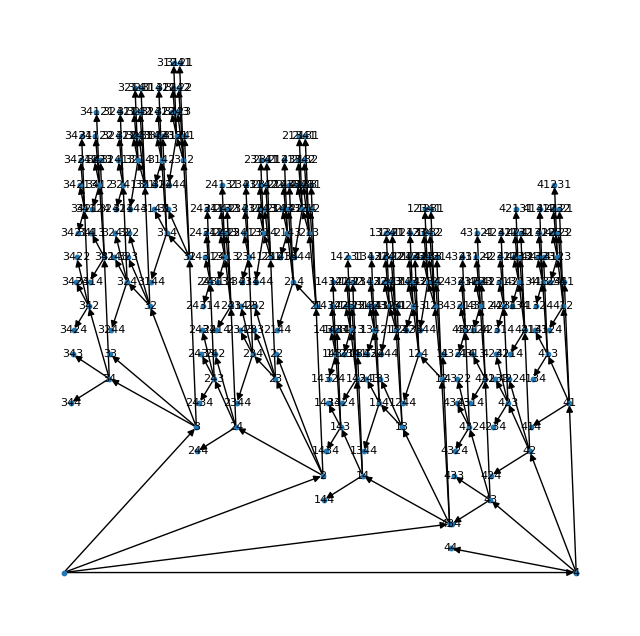

In [7]:
btree.display_tree(figsize=(8, 8))

In [8]:
import sympy
rlct_rec = []
for gen in nx.topological_generations(btree.tree):
    for chart in gen:
        if "rlcts" in btree.tree.nodes[chart].keys() and btree.tree.nodes[chart]["is_normal_crossing"]:
            rlcts = [r for _, r in btree.tree.nodes[chart]["rlcts"]]
            min_rlct = min(rlcts)
            multiplicity = rlcts.count(min_rlct)
            expr = btree.tree.nodes[chart]["expr"]
            display(Math(sympy.latex(expr)))
            display(Math(sympy.latex(btree.tree.nodes[chart]["det(J)"])))
            print(min_rlct, multiplicity)
            rlct_rec.append((min_rlct, multiplicity))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

4 5


In [9]:
print(sorted(rlct_rec, key=lambda x: (x[0], -x[1])))

[(4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 5), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4),

In [7]:
btree.display_leaves_data()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------

